In [8]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [9]:
from sklearn.metrics import root_mean_squared_error as rmse

In [10]:
from xgboost import XGBRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df=pd.read_csv("student_habits_performance.csv")

# EXPLORATORY DATA ANALYSIS

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [16]:
df.drop(columns=['age','gender','parental_education_level','internet_quality','exercise_frequency','diet_quality'],inplace=True)

In [17]:
df["social_media_netflix_hrs"]=df.social_media_hours+df.netflix_hours

In [18]:
df=df.drop(columns=['social_media_hours','netflix_hours'])

In [19]:
categories=df.drop(columns=['student_id']).select_dtypes(object).columns.to_list()

In [20]:
for col in categories:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [21]:
df

,student_id,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,mental_health_rating,extracurricular_participation,exam_score,social_media_netflix_hrs
0,S1000,0.0,0,85.0,8.0,8,1,56.2,2.3
1,S1001,6.9,0,97.3,4.6,8,0,100.0,5.1
2,S1002,1.4,0,94.8,8.0,1,0,34.3,4.4
3,S1003,1.0,0,71.0,9.2,1,1,26.8,4.9
4,S1004,5.0,0,90.9,4.9,1,0,66.4,4.9
...,...,...,...,...,...,...,...,...,...
995,S1995,2.6,0,77.0,7.5,6,1,76.1,2.1
996,S1996,2.9,1,86.0,6.8,6,1,65.9,3.4
997,S1997,3.0,0,61.9,6.5,9,1,64.4,3.9
998,S1998,5.4,1,100.0,7.6,1,0,69.7,5.2


## SCALING THE DATA

In [22]:
scaler=StandardScaler()

In [23]:
df_scaled=scaler.fit_transform(df.drop(columns=['student_id','exam_score']))

In [24]:
df_scaled=pd.DataFrame(df_scaled,columns=df.drop(columns=['student_id','exam_score']).columns)

In [25]:
df_scaled['exam_score']=df['exam_score']

In [26]:
df_scaled

,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,mental_health_rating,extracurricular_participation,social_media_netflix_hrs,exam_score
0,-2.418068,-0.523341,0.092426,1.248120,0.900186,1.464464,-1.266536,56.2
1,2.281707,-0.523341,1.401696,-1.525661,0.900186,-0.682844,0.484551,100.0
2,-1.464491,-0.523341,1.135584,1.248120,-1.559339,-0.682844,0.046779,34.3
3,-1.736942,-0.523341,-1.397800,2.227102,-1.559339,1.464464,0.359473,26.8
4,0.987566,-0.523341,0.720450,-1.280916,-1.559339,-0.682844,0.359473,66.4
...,...,...,...,...,...,...,...,...
995,-0.647139,-0.523341,-0.759132,0.840211,0.197465,1.464464,-1.391613,76.1
996,-0.442801,1.910802,0.198871,0.269138,0.197465,1.464464,-0.578609,65.9
997,-0.374688,-0.523341,-2.366448,0.024393,1.251547,1.464464,-0.265915,64.4
998,1.260017,1.910802,1.689097,0.921793,-1.559339,-0.682844,0.547089,69.7


## IMPORTANCE OF FEATURES

In [27]:
correlation=df_scaled.corr()

<Axes: >

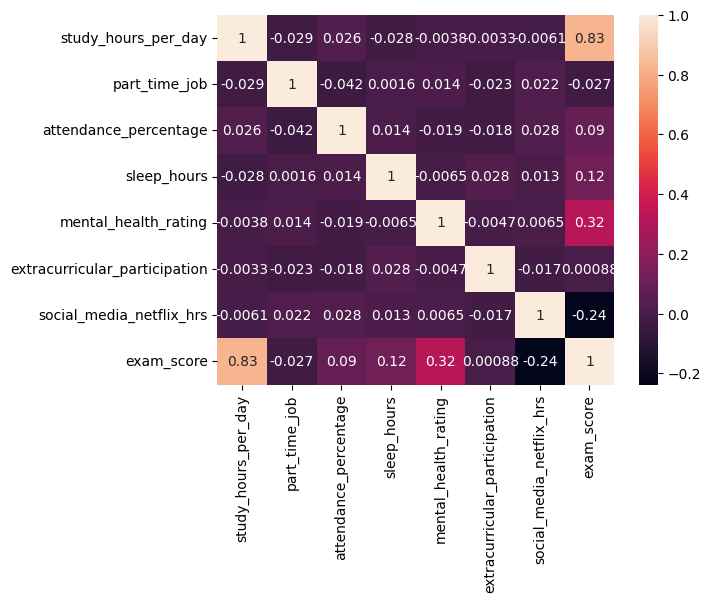

In [28]:
sns.heatmap(correlation,annot=True)

# TRAINING AND TESTING DATA

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train,test=train_test_split(df_scaled, random_state=42,train_size=0.8)

In [31]:
X_train=train.drop(columns=['exam_score'])
Y_train=train['exam_score']
X_test=test.drop(columns=['exam_score'])
Y_test=test['exam_score']

# HYPERPARAMETER TUNING

## XGBOOST hyperparameter tuning

In [32]:
def XGB(X_train,Y_train):
  cv=GridSearchCV(estimator=XGBRegressor(),param_grid={'n_estimators':[56,55,54,57],'max_depth':[2,3],'learning_rate':[0.16,0.2,0.25],'subsample':[0.66,0.69,0.7,0.72,0.73],'colsample_bytree':[0.45,0.44,0.46,0.47,0.48,0.4]},cv=3,n_jobs=-1)
  cv.fit(X_train,Y_train)
  param_xgboost=cv.best_params_
  print(cv.best_params_)
  return param_xgboost

In [33]:
xgboost_params=XGB(X_train,Y_train)

{'colsample_bytree': 0.4, 'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 55, 'subsample': 0.69}


## RANDOM FOREST  hyperparameter tuning

In [34]:
def RandomForest(X_train,Y_train):
  cv=GridSearchCV(estimator=RandomForestRegressor(),param_grid={'n_estimators':[27,28,29,30,35],'max_depth':[17,18,19,20],'min_samples_split':[2,3,4,5],'min_samples_leaf':[2,3,4]},cv=3,n_jobs=-1)
  cv.fit(X_train,Y_train)
  param_rforest=cv.best_params_
  print(param_rforest)
  return param_rforest


In [35]:
rforest_params=RandomForest(X_train,Y_train)

{'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 35}


# TRAINING AND EVALUATING MODEL

In [36]:
def xgb_model(x_train,y_train,x_test,y_test):
  model=XGBRegressor(colsample_bytree= 0.4, learning_rate= 0.224, max_depth= 2, n_estimators= 53, subsample= 0.694, random_state=42)
  model.fit(x_train,y_train)
  prediction_test=model.predict(x_test)
  rmse_test=rmse(y_test,prediction_test)
  return rmse_test

In [37]:
rmse_xgbr=xgb_model(X_train,Y_train,X_test ,Y_test )

In [38]:
def rgr_model(x_train,y_train,x_test,y_test):
  model=RandomForestRegressor(max_depth=19,min_samples_leaf=3,min_samples_split=4, n_estimators=29, random_state=42)
  model.fit(x_train,y_train)
  prediction_test=model.predict(x_test)
  rmse_test=rmse(y_test,prediction_test)
  return rmse_test

In [39]:
rmse_rfr=rgr_model(X_train,Y_train,X_test ,Y_test )

##COMPARING RMSE

In [40]:
models=['XGBoost','RandomForest']

In [41]:
model_selection=pd.DataFrame({'models':models,'params':[xgboost_params,rforest_params],'test_rmse':[rmse_xgbr,rmse_rfr]})

In [42]:
model_selection

,models,params,test_rmse
0,XGBoost,"{'colsample_bytree': 0.4, 'learning_rate': 0.2...",6.881206
1,RandomForest,"{'max_depth': 19, 'min_samples_leaf': 2, 'min_...",6.767394


# BOOTSTRAPPING

##RANDOMFOREST BOOTSTRAPPING

In [43]:
def rfr_model(x_test):
  model=RandomForestRegressor(max_depth=19,min_samples_leaf=3,min_samples_split=4, n_estimators=29, random_state=42,bootstrap=True)
  model.fit(X_train,Y_train)
  rfr_mean_prediction=model.predict(x_test)
  l=[]
  for i in model.estimators_:
    l.append(i.predict(x_test))
  trees=np.array(l)
  rfr_std_prediction=np.std(trees,axis=0)
  return rfr_mean_prediction,rfr_std_prediction

##XGBOOST BOOTSTRAPPING

In [44]:
X_train_array=X_train.to_numpy()

In [45]:
Y_train_array=Y_train.to_numpy()

In [46]:
def xgb_model(x_test):
  model=XGBRegressor(colsample_bytree= 0.4, learning_rate= 0.224, max_depth= 2, n_estimators= 53, subsample= 0.694, random_state=42)

  n_bootstraps=40
  prediction=[]

  for i in range(n_bootstraps):
    index_array=np.random.choice(len(X_train_array),size=len(X_train_array))
    X_train_bootstrap=X_train_array[index_array]
    Y_train_bootstrap=Y_train_array[index_array]
    model.fit(X_train_bootstrap,Y_train_bootstrap)
    pred_bootstrap=model.predict(x_test)
    prediction.append(pred_bootstrap)
  xgb_mean_prediction=np.mean(prediction)
  xgb_std_prediction=np.std(prediction)
  return xgb_mean_prediction,xgb_std_prediction

#WEIGHTS FOR ENSEMBLED PREDICTION

In [47]:
def weights():
  weights=np.linspace(0,1,num=101)
  rmse_list=[]

  model_xgb=XGBRegressor(colsample_bytree= 0.4, learning_rate= 0.224, max_depth= 2, n_estimators= 53, subsample= 0.694, random_state=42)
  model_xgb.fit(X_train,Y_train)
  prediction_xgb=model_xgb.predict(X_test)

  model_rfr=RandomForestRegressor(max_depth=19,min_samples_leaf=3,min_samples_split=4, n_estimators=29, random_state=42,bootstrap=True)
  model_rfr.fit(X_train,Y_train)
  prediction_rfr=model_rfr.predict(X_test)

  for w_rfr in weights:
    ensemble_prediction=w_rfr*prediction_rfr+(1-w_rfr)*prediction_xgb
    rmse_calc=rmse(Y_test,ensemble_prediction)
    rmse_list.append([w_rfr,rmse_calc])

  rmse_min=min(rmse_list,key=lambda x:x[1])
  return rmse_min[0]


# ENSEMBLED PREDICTION AND STANDARD DEVIATION

In [48]:
def ensemble_pred(rfr_mean_prediction,rfr_std_prediction,xgb_mean_prediction,xgb_std_prediction):
  w_rfr=weights()
  w_xgb=1-w_rfr
  ensemble_mean_prediction=w_rfr*rfr_mean_prediction+w_xgb*xgb_mean_prediction
  ensemble_std_prediction=w_rfr*rfr_std_prediction+w_xgb*xgb_std_prediction
  return ensemble_mean_prediction,ensemble_std_prediction

In [49]:
def bootstrapping(input_scaled):
  rfr_mean_prediction,rfr_std_prediction=rfr_model(input_scaled)
  xgb_mean_prediction,xgb_std_prediction=xgb_model(input_scaled)
  return ensemble_pred(rfr_mean_prediction,rfr_std_prediction,xgb_mean_prediction,xgb_std_prediction)

# INPUT

In [50]:
def predict(input_features):
  study_hours_per_day=input_features[0]
  part_time_job=input_features[1]
  attendance_percentage=input_features[2]
  sleep_hours=input_features[3]
  mental_health_rating=input_features[4]
  extracurricular_participation=input_features[5]
  social_media_netflix_hrs=input_features[6]

  input=pd.DataFrame({'study_hours_per_day':[study_hours_per_day],'part_time_job':[part_time_job],'attendance_percentage':[attendance_percentage],'sleep_hours':[sleep_hours],'mental_health_rating':[mental_health_rating],'extracurricular_participation':[extracurricular_participation],'social_media_netflix_hrs':[social_media_netflix_hrs]})
  input_scaled=scaler.transform(input)
  return bootstrapping(input_scaled)

# CONFIDENCE INTERVAL

In [51]:
def confidence_interval(input_features):
  mean_prediction,std_prediction=predict(input_features)
  mean = mean_prediction[0] if isinstance(mean_prediction, (np.ndarray, list)) else mean_prediction
  if mean<0:
    mean=0
  elif mean>100:
    mean=100
  else:
    mean = mean_prediction[0] if isinstance(mean_prediction, (np.ndarray, list)) else mean_prediction
  std = std_prediction[0] if isinstance(std_prediction, (np.ndarray, list)) else std_prediction
  upper=mean+1.96*std
  lower=mean-1.96*std
  width=upper-lower

  if width<10:
    return mean ,"HIGH cONFIDENCE"
  elif width<20:
    return mean ,"MODERATE CONFIDENCE"
  else:
    return mean ,"LOW CONFIDENCE"